<a href="https://colab.research.google.com/github/FJSD08/master-series-forecasting-notebook/blob/main/EnbPI_Dataset_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aws-fortuna==0.1.36

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.0/321.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.2/227.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Su

In [ ]:
!pip install jax==0.4.14
!pip install jaxlib==0.4.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jax: filename=jax-0.4.14-py3-none-any.whl size=1535361 sha256=35edf7417bda435fe408f106c44b8376a251289584c723973467c072ee337ea6
  Stored in directory: /root/.cache/pip/wheels/85/52/e7/dfa571c9f9b879e3facaa1584f52be04c4c3d1e14054ef40ab
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires jax>=0.4.16, but you have jax 0.4.14 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: jaxlib

In [ ]:
import ml_dtypes
import numpy as np
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

from fortuna.conformal import EnbPI
from fortuna.conformal import QuantileConformalRegressor
from fortuna.metric.regression import prediction_interval_coverage_probability


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Mestrado/todos_pzs.xlsx')
data

,Data,pz01,pz02,pz04,pz05,pz06,pz07,pz08,pz09,pz10,pz11,pz12,pz13,pz14,pz15,pz16
0,22/12/2019,1159.115552,1153.002420,1147.878218,1145.262171,1141.464434,1147.171859,1138.559694,1135.433764,1153.101231,1146.237879,1155.523278,1148.232515,1166.578,1164.845,1162.427
1,23/12/2019,1159.062807,1153.011490,1147.879594,1145.259774,1141.559603,1147.170972,1138.568308,1135.435364,1153.102087,1146.234667,1155.523784,1148.232064,1166.578,1164.855,1162.417
2,24/12/2019,1159.011332,1153.004496,1147.876531,1145.260790,1141.552286,1147.167621,1138.559440,1135.435206,1153.100190,1146.270777,1155.523218,1148.231010,1166.578,1164.845,1162.427
3,25/12/2019,1158.970063,1153.004245,1147.875138,1145.263543,1141.590938,1147.167137,1138.573925,1135.428538,1153.100426,1146.233549,1155.523617,1148.231738,1166.598,1164.855,1162.427
4,26/12/2019,1158.930182,1153.000024,1147.872569,1145.260504,1141.440208,1147.167534,1138.568303,1135.434140,1153.101723,1146.234007,1155.522791,1148.231956,1166.588,1164.835,1162.407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,28/05/2020,1158.375774,1152.943213,1147.804107,1145.158057,1141.836837,1147.160309,1138.549285,1135.447482,1153.063707,1146.248638,1155.489532,1148.198550,1167.038,1165.165,1162.867
159,29/05/2020,1158.370977,1152.942927,1147.808108,1145.158081,1141.841422,1147.161232,1138.550624,1135.450933,1153.064136,1146.243362,1155.489663,1148.198804,1167.018,1165.165,1162.847
160,30/05/2020,1158.368154,1152.939596,1147.808620,1145.157667,1141.839046,1147.160969,1138.549410,1135.449212,1153.062947,1146.244249,1155.489807,1148.198254,1167.018,1165.165,1162.857
161,31/05/2020,1158.367238,1152.940783,1147.804170,1145.157926,1141.842952,1147.160845,1138.548993,1135.450127,1153.061769,1146.308516,1155.490427,1148.199093,1167.018,1165.155,1162.857


In [ ]:
# Supondo que 'df' é o seu DataFrame e 'timestamp_column' é o nome da coluna de timestamp
data['Data'] = pd.to_datetime(data['Data'])

<ipython-input-30-22a5259a539b>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Data'] = pd.to_datetime(data['Data'])


In [ ]:
# Convertendo a coluna 'TIMESTAMP' para o formato datetime
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Definindo 'TIMESTAMP' como índice do DataFrame
data.set_index('Data', inplace=True)

In [ ]:
# Supondo que 'data' é um DataFrame Pandas e 'target' é a coluna que você deseja prever
X = data.drop('pz16', axis=1)  # Substitua 'target' pelo nome real da sua variável dependente
y = data['pz16']  # Variável dependente

In [ ]:
# Dividir os dados em treino e teste não é tão simples quanto uma divisão aleatória em dados temporais
# Walk-Forward Validation para séries temporais
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

print(f"Treino: {len(X_train)}, Teste: {len(X_test)} ")

Treino: 130, Teste: 33 


In [ ]:
import numpy as np

class DataFrameBootstrapper:
    def __init__(self, n_samples: int):
        self.n_samples = n_samples

    def __call__(
        self, X: np.ndarray, y: np.ndarray
    ) -> tuple[np.ndarray, list[tuple[np.ndarray, np.ndarray]]]:
        indices = np.random.choice(y.shape[0], size=(self.n_samples, y.shape[0]))
        return indices, [(X.iloc[idx], y.iloc[idx]) for idx in indices]

In [ ]:
n_bs_samples = 12
bs_indices, bs_train_data = DataFrameBootstrapper(n_samples=n_bs_samples)(
    X_train, y_train
)

In [ ]:
# returns 11 boostrap samples from the training set
bs_indices.shape

(12, 130)

In [ ]:
bs_indices

array([[129,  39,   7, ...,   1,  18,   9],
       [ 66,  33,  87, ...,  59,  48, 102],
       [  2,  91,  45, ...,  37,  72,  21],
       ...,
       [ 39,  25,   2, ..., 100,   8,  84],
       [ 96, 104, 126, ..., 105, 117,  77],
       [118,  43,  29, ...,  58,  75,  20]])

In [ ]:
X_train.shape

(130, 14)

In [ ]:
len(bs_train_data)

12

In [ ]:
# first bootstrap sample - X
bs_train_data[0][0]

,pz01,pz02,pz04,pz05,pz06,pz07,pz08,pz09,pz10,pz11,pz12,pz13,pz14,pz15
Data,,,,,,,,,,,,,,
2020-04-29,1158.475309,1152.963466,1147.825119,1145.156894,1141.708054,1147.159790,1138.549269,1135.437909,1153.063672,1146.251051,1155.489094,1148.197405,1167.398,1165.235
2020-01-30,1162.197187,1153.030033,1147.888879,1145.263024,1141.391314,1147.163756,1138.564555,1135.439025,1153.101218,1146.221676,1155.587697,1148.254763,1167.378,1165.085
2019-12-29,1158.823264,1152.999914,1147.869866,1145.260549,1141.436654,1147.163099,1138.570403,1135.434322,1153.100437,1146.240450,1155.523684,1148.231397,1166.628,1164.835
2020-02-02,1160.500519,1153.016287,1147.877904,1145.261545,1141.420694,1147.164417,1138.562996,1135.434984,1153.100321,1146.224536,1155.523722,1148.232661,1167.468,1165.075
2020-03-17,1159.067060,1152.971116,1147.861662,1145.199850,1141.671912,1147.159447,1138.547982,1135.444464,1153.124284,1146.257718,1155.489599,1148.235750,1168.128,1165.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,1159.042354,1152.973337,1147.861212,1145.197373,1141.678867,1147.158835,1138.546410,1135.444094,1153.106697,1146.248784,1155.489133,1148.235571,1168.078,1165.245
2020-02-09,1160.577290,1153.014709,1147.872044,1145.262705,1141.552769,1147.162839,1138.566550,1135.434571,1153.100579,1146.224305,1155.523508,1148.297719,1167.578,1165.085
2019-12-23,1159.062807,1153.011490,1147.879594,1145.259774,1141.559603,1147.170972,1138.568308,1135.435364,1153.102087,1146.234667,1155.523784,1148.232064,1166.578,1164.855


In [ ]:
# first bootstrap sample - y
bs_train_data[0][1]

Data
2020-04-29    1162.947
2020-01-30    1162.627
2019-12-29    1162.427
2020-02-02    1162.607
2020-03-17    1162.987
                ...   
2020-03-18    1162.967
2020-02-09    1162.667
2019-12-23    1162.417
2020-01-09    1162.427
2019-12-31    1162.427
Name: pz16, Length: 130, dtype: float64

In [ ]:
# Get a boolean series where True indicates the index is duplicated
duplicate_indices = bs_train_data[0][0].index.duplicated(keep=False)

# Print the duplicated indices
print(bs_train_data[0][0].index[duplicate_indices])

DatetimeIndex(['2020-04-29', '2020-01-30', '2020-02-02', '2020-03-06',
               '2020-01-31', '2020-04-19', '2020-04-19', '2020-03-06',
               '2020-03-02', '2020-01-31', '2020-02-02', '2020-04-02',
               '2020-04-25', '2020-02-15', '2020-03-24', '2020-03-16',
               '2020-01-21', '2020-04-12', '2020-02-12', '2020-03-27',
               '2020-01-18', '2020-03-24', '2020-02-15', '2019-12-23',
               '2020-04-24', '2020-04-02', '2020-02-02', '2020-03-10',
               '2020-03-01', '2019-12-23', '2020-04-25', '2020-02-26',
               '2020-04-24', '2020-01-21', '2020-01-02', '2020-03-02',
               '2020-03-20', '2020-03-06', '2020-01-02', '2020-02-15',
               '2020-01-21', '2019-12-24', '2020-01-02', '2020-01-16',
               '2020-03-10', '2020-04-12', '2020-04-29', '2020-01-27',
               '2019-12-24', '2020-02-11', '2020-01-14', '2020-01-27',
               '2020-01-18', '2020-01-14', '2020-03-24', '2020-03-01',
      

In [ ]:
bs_train_data[0][0].loc[bs_train_data[0][0].index[duplicate_indices][0]]

,pz01,pz02,pz04,pz05,pz06,pz07,pz08,pz09,pz10,pz11,pz12,pz13,pz14,pz15
Data,,,,,,,,,,,,,,
2020-04-29,1158.475309,1152.963466,1147.825119,1145.156894,1141.708054,1147.15979,1138.549269,1135.437909,1153.063672,1146.251051,1155.489094,1148.197405,1167.398,1165.235
2020-04-29,1158.475309,1152.963466,1147.825119,1145.156894,1141.708054,1147.15979,1138.549269,1135.437909,1153.063672,1146.251051,1155.489094,1148.197405,1167.398,1165.235


In [ ]:
'''
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Configurando o pipeline com apenas o RandomForestRegressor
rf_pipeline = make_pipeline(
    RandomForestRegressor(random_state=42)
).set_output(transform="pandas")
# Supondo que X_train e y_train sejam suas variáveis de treino
# rf_pipeline.fit(X_train, y_train)  # Você usaria isso para treinar o modelo
# predictions = rf_pipeline.predict(X_test)  # E isso para fazer previsões

'''

'\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Configurando o pipeline com apenas o RandomForestRegressor\nrf_pipeline = make_pipeline(\n    RandomForestRegressor(random_state=42)\n).set_output(transform="pandas")\n# Supondo que X_train e y_train sejam suas variáveis de treino\n# rf_pipeline.fit(X_train, y_train)  # Você usaria isso para treinar o modelo\n# predictions = rf_pipeline.predict(X_test)  # E isso para fazer previsões\n\n'

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

# Configurando o pipeline com apenas o HistGradientBoostingRegressor
gbrt_pipeline = make_pipeline(
    HistGradientBoostingRegressor(random_state=42)
).set_output(transform="pandas")


In [ ]:

#GRADIENTE BOOSTING

bs_train_preds = np.zeros((n_bs_samples, X_train.shape[0]))
bs_test_preds = np.zeros((n_bs_samples, X_test.shape[0]))
for i, batch in enumerate(bs_train_data):
    gbrt_pipeline.fit(*batch)
    bs_train_preds[i] = gbrt_pipeline.predict(X_train)  # Correção aqui
    bs_test_preds[i] = gbrt_pipeline.predict(X_test)  # Correção aqui



In [ ]:
'''
# RANDOM FOREST

bs_train_preds = np.zeros((n_bs_samples, X_train.shape[0]))
bs_test_preds = np.zeros((n_bs_samples, X_test.shape[0]))
for i, batch in enumerate(bs_train_data):
    rf_pipeline.fit(*batch)
    bs_train_preds[i] = rf_pipeline.predict(X_train)
    bs_test_preds[i] = rf_pipeline.predict(X_test)

'''

In [ ]:
predictions = gbrt_pipeline.predict(X_test)  # E isso para fazer previsõesf

In [ ]:
conformal_intervals = EnbPI().conformal_interval(
    bootstrap_indices=bs_indices,
    bootstrap_train_preds=bs_train_preds,
    bootstrap_test_preds=bs_test_preds,
    train_targets=y_train.values,
    error=0.05,
)

In [ ]:
print(
    "Percentage of intervals containing average bootstrap predictions: "
    f"{prediction_interval_coverage_probability(*conformal_intervals.T, bs_test_preds.mean(0))}."
)
print(
    "Percentage of intervals containing true targets: "
    f"{prediction_interval_coverage_probability(*conformal_intervals.T, y_test.values)}."
)
print(f"Size of the conformal intervals: {np.diff(conformal_intervals)[0][0]}")

Percentage of intervals containing average bootstrap predictions: 1.0.
Percentage of intervals containing true targets: 1.0.
Size of the conformal intervals: 0.131591796875


In [ ]:
'''

import numpy as np
import matplotlib.pyplot as plt

# Suponha que y_test, predictions e conformal_intervals sejam suas séries de dados
# Você precisará garantir que predictions e conformal_intervals também sejam arrays ou pandas Series
# Vamos assumir que todos esses dados já estão alinhados e formatados corretamente.

n_points = len(y_test)  # Calculando o número de pontos de dados

# Criando o gráfico
plt.figure(figsize=(12, 4))
plt.plot(y_test, label="True Test Target", color="blue")
plt.plot(predictions, label="Predictions", color="green", linestyle='--')
plt.fill_between(
    np.arange(n_points),
    conformal_intervals[:, 0],  # Limite inferior
    conformal_intervals[:, 1],  # Limite superior
    alpha=0.5,
    color="gray",
    label="Conformal Interval"
)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=11, loc="upper right")
plt.show()

'''

'\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Suponha que y_test, predictions e conformal_intervals sejam suas séries de dados\n# Você precisará garantir que predictions e conformal_intervals também sejam arrays ou pandas Series\n# Vamos assumir que todos esses dados já estão alinhados e formatados corretamente.\n\nn_points = len(y_test)  # Calculando o número de pontos de dados\n\n# Criando o gráfico\nplt.figure(figsize=(12, 4))\nplt.plot(y_test, label="True Test Target", color="blue")\nplt.plot(predictions, label="Predictions", color="green", linestyle=\'--\')\nplt.fill_between(\n    np.arange(n_points),\n    conformal_intervals[:, 0],  # Limite inferior\n    conformal_intervals[:, 1],  # Limite superior\n    alpha=0.5,\n    color="gray",\n    label="Conformal Interval"\n)\nplt.xlabel("Data Points", fontsize=14)\nplt.ylabel("Values", fontsize=14)\nplt.legend(fontsize=11, loc="upper right")\nplt.show()\n\n'

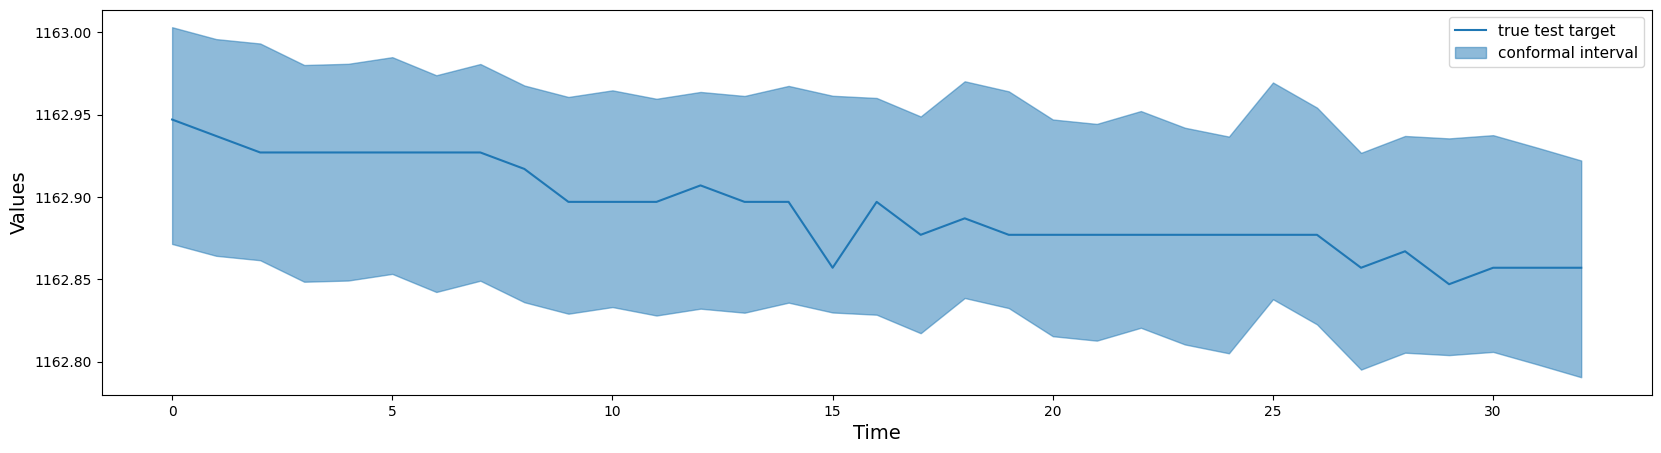

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label="true test target")
plt.fill_between(
    np.arange(len(y_test)),
    conformal_intervals[:, 0],
    conformal_intervals[:, 1],
    alpha=0.5,
    color="C0",
    label="conformal interval",
)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=11, loc="upper right")
plt.show()

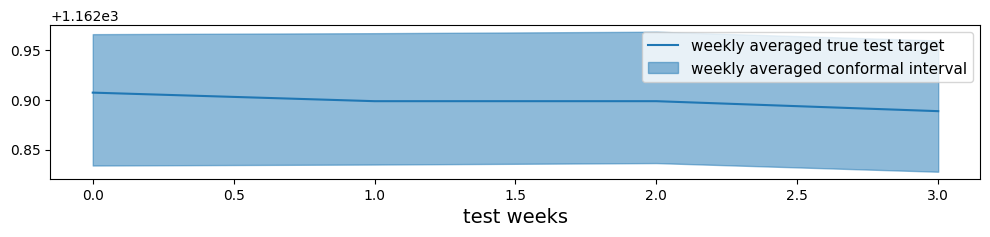

In [ ]:
def weakly_avg(x):
    s = x.shape[0] // 7
    x = x[: s * 7]
    return x.reshape(7, s, *x.shape[1:]).mean(0)


weekly_avg_test = weakly_avg(y_test.values)
n_weeks = weekly_avg_test.shape[0]

plt.figure(figsize=(12, 2))
plt.plot(weakly_avg(y_test.values), label="weekly averaged true test target")
plt.fill_between(
    np.arange(n_weeks),
    *weakly_avg(conformal_intervals).T,
    alpha=0.5,
    color="C0",
    label="weekly averaged conformal interval",
)
plt.xlabel("test weeks", fontsize=14)
plt.legend(fontsize=11, loc="upper right")

In [ ]:
batch_size = 1
conformal_intervals2 = np.zeros((len(y_test), 2))
for i in range(0, len(y_test), batch_size):
    if i == 0:
        conformal_intervals2[:batch_size], train_residuals = EnbPI().conformal_interval(
            bootstrap_indices=bs_indices,
            bootstrap_train_preds=bs_train_preds,
            bootstrap_test_preds=bs_test_preds[:, :batch_size],
            train_targets=y_train.values,
            error=0.05,
            return_residuals=True,
        )
    else:
        (
            conformal_intervals2[i : i + batch_size],
            train_residuals,
        ) = EnbPI().conformal_interval_from_residuals(
            train_residuals=train_residuals,
            bootstrap_new_train_preds=bs_test_preds[:, i - batch_size : i],
            bootstrap_new_test_preds=bs_test_preds[:, i : i + batch_size],
            new_train_targets=y_test.values[i - batch_size : i],
            error=0.05,
        )

In [ ]:
print(
    "Percentage of intervals containing average bootstrap predictions: "
    f"{prediction_interval_coverage_probability(*conformal_intervals2.T, bs_test_preds.mean(0))}."
)
print(
    "Percentage of intervals containing true targets: "
    f"{prediction_interval_coverage_probability(*conformal_intervals2.T, y_test.values)}."
)

Percentage of intervals containing average bootstrap predictions: 1.0.
Percentage of intervals containing true targets: 1.0.


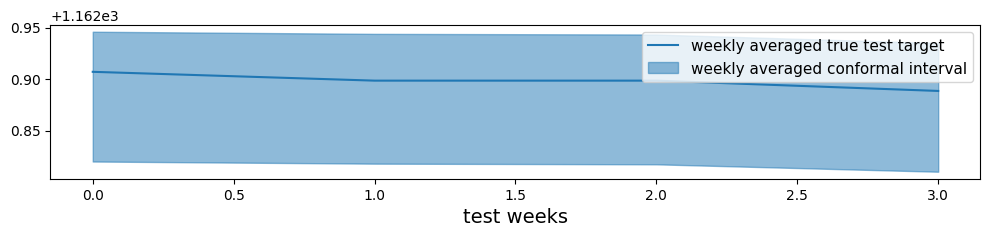

In [ ]:
plt.figure(figsize=(12, 2))
plt.plot(weakly_avg(y_test.values), label="weekly averaged true test target")
plt.fill_between(
    np.arange(n_weeks),
    *weakly_avg(conformal_intervals2).T,
    alpha=0.5,
    color="C0",
    label="weekly averaged conformal interval",
)
plt.xlabel("test weeks", fontsize=14)
plt.legend(fontsize=11, loc="upper right")

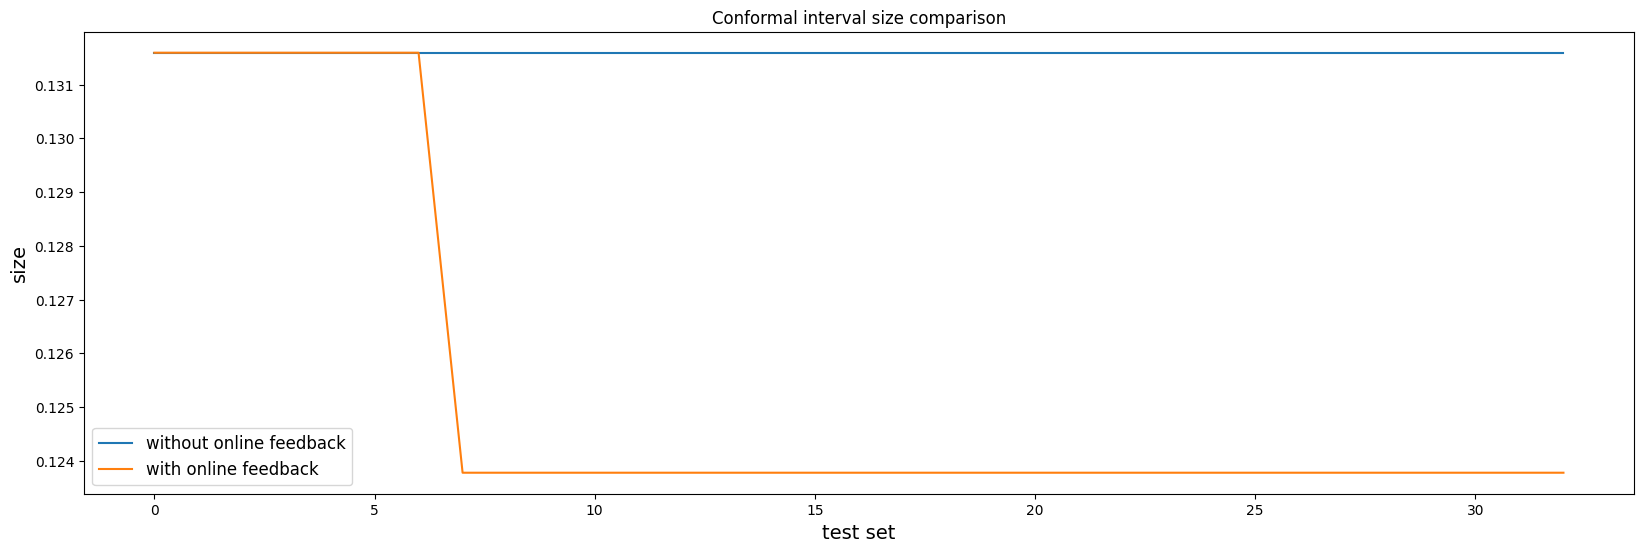

In [ ]:
# The following plot compares the size of the intervals without and with online feedback.
plt.figure(figsize=(20, 6))
plt.title("Conformal interval size comparison")
plt.plot(np.diff(conformal_intervals), label="without online feedback")
plt.plot(np.diff(conformal_intervals2), label="with online feedback")
plt.xlabel("test set", fontsize=14)
plt.ylabel("size", fontsize=14)
plt.legend(fontsize=12)